In [1]:
from fuzzyART_gai import *
from kit_handy import *
from kit_painting import *
import matplotlib.pyplot as plt

In [2]:
alldata, label_true = load_data('iris') #'gaussian2d') #  
pca_painter = PaintPCA(alldata)

Variance explained by first 2 principal components: [0.92138578 0.05142129]


Category 2 is too small
Category 3 is too small
Category 4 is too small
Category 5 is too small
Category 6 is too small
Category 7 is too small
Category 8 is too small
Category 9 is too small
Category 10 is too small
Category 11 is too small
Category 12 is too small
Category 13 is too small
Category 14 is too small
Category 5 is too small
Category 2 is too small
Category 3 is too small
Category 4 is too small
Category 5 is too small
Category 6 is too small
Category 7 is too small
Category 8 is too small
Category 9 is too small
Category 10 is too small
Category 11 is too small
Category 12 is too small
Category 13 is too small
Category 14 is too small
Category 15 is too small
Category 2 is too small
Category 3 is too small
Category 4 is too small
Category 5 is too small
Category 6 is too small
Category 7 is too small
Category 4 is too small
Category 5 is too small
Category 6 is too small
Category 3 is too small
Category 4 is too small
Category 5 is too small
Category 6 is too small
Categ

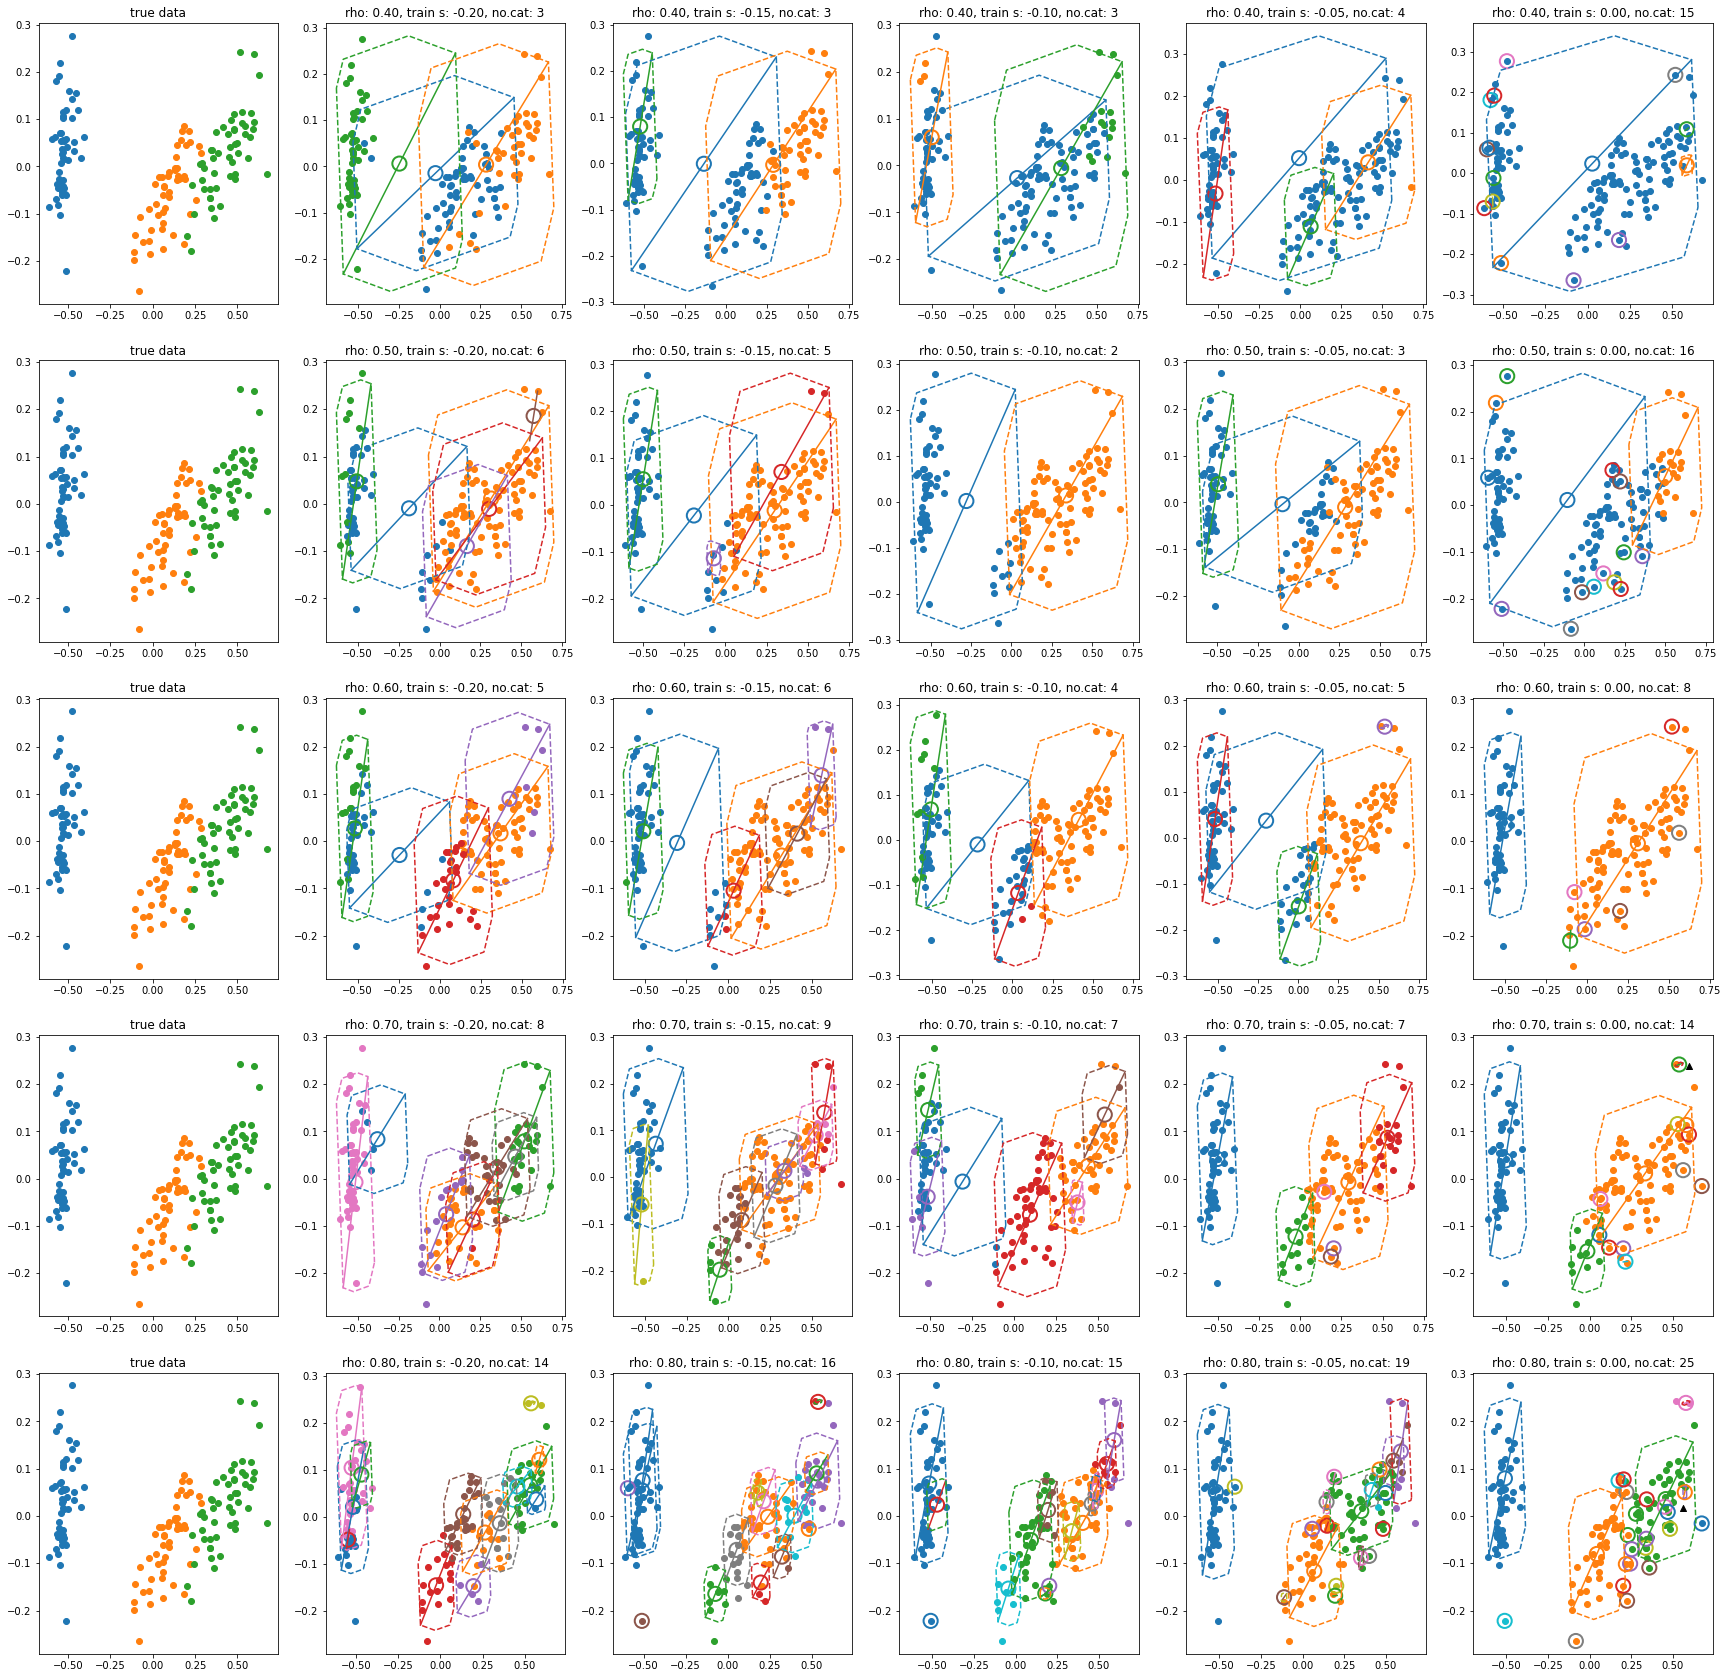

In [7]:
np.random.shuffle(alldata)

no_rho = 5
ls_rho = np.linspace(.4, .8, no_rho)

no_s_train = 5
ls_s_train = np.linspace(-.2, 0, no_s_train)

fig, axs = plt.subplots(no_s_train, no_rho + 1,
                        figsize = (30, 30))
#fig.tight_layout()

# plot true data
for ax in axs.T[0]:
    pca_painter.scatter(ax, label_true)
    ax.set_title("true data")


s_test = 0.1

for rho, axrow in zip(ls_rho, axs):
    for s_train, ax in zip(ls_s_train, axrow[1:]):
        # init
        net = FuzzyART(alpha=0.5, gamma=.00001, rho=rho)

        # train
        net.train(alldata, s=s_train) # each epoch, all data is shuffled
        label_predall = net.test(alldata, s=s_test)
        label_pred = label_predall[:, 0].astype(int)

        # plot
        # pred
        pca_painter.scatter(ax, label_pred, alldata)

        # bipole and centre
        pca_painter.tripole(ax, *net.getcat_bipole())

        # boundary    
        ax.set_prop_cycle(None)
        pca_painter.boundary(ax, net.getcat_vertex())

        # info
        cat_number = net.w.shape[0]
        ax.set_title('rho: {:.2f}, train s: {:.2f}, no.cat: {}'.format(rho, s_train, cat_number))
    
# save fig
simname = 'fix_stest{:d}_var_rho{:d}_strain{:d}'.format(int(s_test*100), int(rho*100), int(s_train*100))
dirname = '_simcache'
savefigure_datetime(fig, simname, dirname)